In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-14.297056497795396, 102.08441829760096),
 (-43.789176435779545, -113.83276795437826),
 (59.996860764800545, 9.221243800894399),
 (34.29525296348052, -24.59404961940723),
 (-11.915943547455086, -108.51512553297313),
 (14.84049809204771, 169.60580649798396),
 (-81.49925974017505, -92.352228910678),
 (18.527857430631443, 60.352174730920666),
 (30.94189121797099, -50.63710503268359),
 (31.80129806254257, -0.0454566104923515),
 (27.599587397316597, -55.71336352087911),
 (-64.84730700781867, -81.00075972371465),
 (26.60127594047637, 88.16617394789915),
 (75.71041814637982, 54.15546019918554),
 (-45.01168112728043, -163.21288857225412),
 (5.231289737025662, -0.8992483667435067),
 (-66.07093609983515, 70.18371443600606),
 (51.74512481937822, 136.84192939840096),
 (-51.00150120448776, 40.430620213302035),
 (52.04480274181424, 98.61391946764445),
 (23.90939905049892, -164.04784347722588),
 (40.60026735527728, -142.84020571965118),
 (54.18209830338952, 106.85527053740685),
 (18.328014872740866

# Display coordinates in for loop

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-14.297056497795396 102.08441829760096
-43.789176435779545 -113.83276795437826
59.996860764800545 9.221243800894399
34.29525296348052 -24.59404961940723
-11.915943547455086 -108.51512553297313
14.84049809204771 169.60580649798396
-81.49925974017505 -92.352228910678
18.527857430631443 60.352174730920666
30.94189121797099 -50.63710503268359
31.80129806254257 -0.0454566104923515
27.599587397316597 -55.71336352087911
-64.84730700781867 -81.00075972371465
26.60127594047637 88.16617394789915
75.71041814637982 54.15546019918554
-45.01168112728043 -163.21288857225412
5.231289737025662 -0.8992483667435067
-66.07093609983515 70.18371443600606
51.74512481937822 136.84192939840096
-51.00150120448776 40.430620213302035
52.04480274181424 98.61391946764445
23.90939905049892 -164.04784347722588
40.60026735527728 -142.84020571965118
54.18209830338952 106.85527053740685
18.328014872740866 17.005971180388315
-29.07725671791301 -174.31652724828808
44.475559084187466 37.626642411272115
-54.97957231384986 6

# Map Nearest city to coordinates

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

# Make Request for Data to an API

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ef41da726500c6f691a33dccaeb7ff7


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | notodden
Processing Record 4 of Set 1 | vila franca do campo
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | sur
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | aflu
City not found. Skipping...
Processing Record 11 of Set 1 | bhadrapur
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | mumford
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | gorin
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | orlik
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | kachug
Processing Record 22 of Set 1 | faya
Processi

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.90,71,3,9.53,PF,2022-07-19 13:53:54
1,Notodden,59.5594,9.2585,89.51,38,0,6.91,NO,2022-07-19 13:53:54
2,Vila Franca Do Campo,37.7167,-25.4333,73.81,76,76,3.74,PT,2022-07-19 13:53:54
3,Puerto Ayora,-0.7393,-90.3518,67.55,99,91,8.01,EC,2022-07-19 13:53:16
4,Butaritari,3.0707,172.7902,81.88,77,18,16.24,KI,2022-07-19 13:53:24
5,Punta Arenas,-53.1500,-70.9167,37.51,93,75,25.32,CL,2022-07-19 13:53:55
6,Sur,22.5667,59.5289,86.05,86,62,5.88,OM,2022-07-19 13:53:55
7,Saint George,37.1041,-113.5841,84.79,38,0,3.44,US,2022-07-19 13:53:55
8,Bhadrapur,26.5440,88.0944,82.02,84,100,6.85,NP,2022-07-19 13:53:56
9,Avarua,-21.2078,-159.7750,73.45,68,40,6.91,CK,2022-07-19 13:53:56


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-19 13:53:54,-23.1203,-134.9692,73.90,71,3,9.53
1,Notodden,NO,2022-07-19 13:53:54,59.5594,9.2585,89.51,38,0,6.91
2,Vila Franca Do Campo,PT,2022-07-19 13:53:54,37.7167,-25.4333,73.81,76,76,3.74
3,Puerto Ayora,EC,2022-07-19 13:53:16,-0.7393,-90.3518,67.55,99,91,8.01
4,Butaritari,KI,2022-07-19 13:53:24,3.0707,172.7902,81.88,77,18,16.24
5,Punta Arenas,CL,2022-07-19 13:53:55,-53.1500,-70.9167,37.51,93,75,25.32
6,Sur,OM,2022-07-19 13:53:55,22.5667,59.5289,86.05,86,62,5.88
7,Saint George,US,2022-07-19 13:53:55,37.1041,-113.5841,84.79,38,0,3.44
8,Bhadrapur,NP,2022-07-19 13:53:56,26.5440,88.0944,82.02,84,100,6.85
9,Avarua,CK,2022-07-19 13:53:56,-21.2078,-159.7750,73.45,68,40,6.91


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

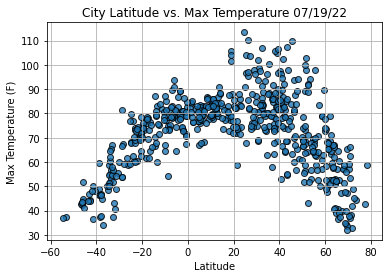

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

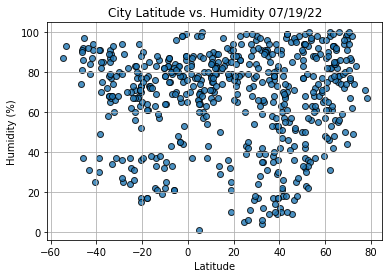

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

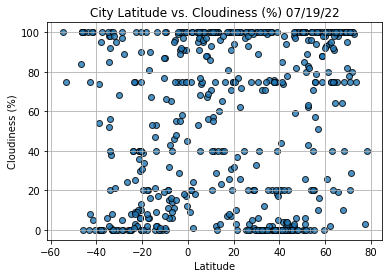

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

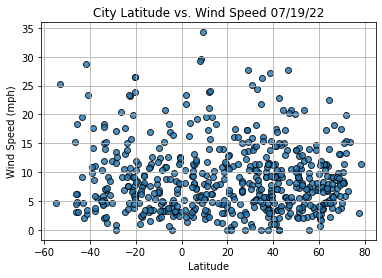

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()